<style>
#toc-container {
  height: 400px; /* Adjust the height as needed */
  overflow-y: auto;
  position: fixed; /* Optional: to make the TOC fixed on the page */
  left: 0;
  top: 0;
  width: 200px; /* Adjust the width as needed */
}
.highlight-link {
  background-color: yellow;
}
</style>

# **Machine Learning Main Ideas**

## **Question 1**

### Define supervised and unsupervised learning. What are the difference(s) between them?

Supervised learning is when the data contains an outcome variable Y: often the goal is to predict Y, or infer connections between the predicitiors and Y. In unsupervised learning, no such outcome variable exists. Instead the goal is to cluster/group data based on similarities.

## **Question 2**

### Explain the difference between a regression model and a classification model, specifically in the context of machine learning.

A regression model contains a quantitative output variable, while a classification model contains a qualitative output variable. However, either model can contain quantatiative and/or qualitative **INPUT** variables

## **Question 3**

### Name two commonly used metrics for regression ML problems. Name two commonly used metrics for classification ML problems.

**Regression**: Mean Squared Error (MSE), Mean Absolute Percent Error (MAPE)  
  
**Classification**: Error Rate, Precision

## **Question 4**

### As discussed, statistical models can be used for different purposes. These purposes can generally be classified into the following three categories. Provide a brief description of each.

**Descriptive models:** A model that can be used to highlight trends visually  
  
**Inferential models:** A model that illustrates the functional dependence of Y on its predictors and shows which features are signifcant vs insignificant  
  
**Predictive models:** A model that performs well at predicting Y for unseen testing data and to minimize reducible error

## **Question 5**

### Predictive models are frequently used in machine learning, and they can usually be described as either mechanistic or empirically-driven. Answer the following questions.

**Define mechanistic. Define empirically-driven. How do these model types differ? How are they similar?**  
  
A mechanistic model assumes a functional dependence of Y on the features, i.e. $\hat{Y}=\beta_0+\beta_1*X_1+....$  
An emperically driven model makes no assumption about the functional dependence of Y on the features  
The two models differ on their assumptions and also the amount of data require: generally, emperical models require more data  
The two models can both suffer from the issue of overfitting  
  
**In general, is a mechanistic or empirically-driven model easier to understand? Explain your choice.**  
  
Typically mechanistic models are easier to understand since they display the functional dependence of Y on the features. For example, a linear or quadratic relationship between Y and a feature, or an interaction term between two features and Y, etc.  
  
**Describe how the bias-variance tradeoff is related to the use of mechanistic or empirically-driven models.**  

The bias variance trade-off refers to the ability of a model to make accurate predictions on unseen test data (bias) and the stability of a model when its training data is changed (variance). To decrease bias one must increase variance and vice versa. Since mechanistic models are inflexible, they will generally suffer from higher bias, since the assumed form will usually not be exact. However, these models will suffer from less variance, meaning that adjusting the input data should have less influence on the predictions. The opposite is true for emperical models since they are more flexible.

## **Question 6**

### A political candidate’s campaign has collected some detailed voter history data from their constituents. The campaign is interested in two questions:

<ol type="a">
  <li>Given a voter’s profile/data, how likely is it that they will vote in favor of the candidate?</li>
  <li>How would a voter’s likelihood of support for the candidate change if they had personal contact with the candidate?</li>
</ol>  

### Classify each question as either predictive or inferential. Explain your reasoning for each.

<ol type="a">
  <li>This is a prediction problem since the goal is to estimate an outcome given input data</li>
  <li>This is an inference problem since it seeks to investigate the relationship between the output variable and an input variable (personal contact or not)</li>
<ol>

# **Exploratory Data Analysis**

This section will ask you to complete several exercises. For this homework assignment, we’ll be working with the mpg data set that is loaded when you load the tidyverse. Make sure you load the tidyverse and any other packages you need.

Exploratory data analysis (or EDA) is not based on a specific set of rules or formulas. It is more of a state of curiosity about data. It’s an iterative process of:

generating questions about data
visualize and transform your data as necessary to get answers
use what you learned to generate more questions
A couple questions are always useful when you start out. These are “what variation occurs within the variables,” and “what covariation occurs between the variables.”

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

mpg = pd.read_csv('mpg.csv')

## **Exercise 1**

### We are interested in highway miles per gallon, or the hwy variable. Create a histogram of this variable. Describe what you see/learn.

The hwy variable seems to be skewed right and bimodal near 15 and 25. The range is between 0-50.

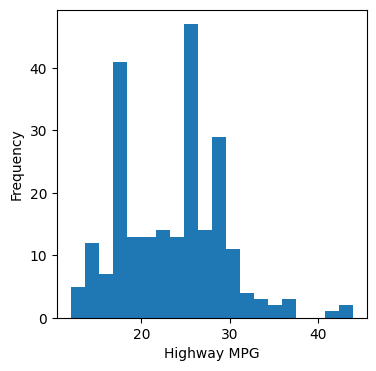

In [2]:
plt.figure(figsize=(4,4))
plt.hist(mpg['hwy'],bins=20)
plt.xlabel('Highway MPG')
plt.ylabel('Frequency')
plt.show()

# **Exercise 2**

### Create a scatterplot. Put hwy on the x-axis and cty on the y-axis. Describe what you notice. Is there a relationship between hwy and cty? What does this mean?

There seems to be a strong positive, linear relationship between the two variables with a slope near 1. This means that for a one unit increase in Highway MPG we expect to see an increase of about 1 in City MPG, regardless of where you start.

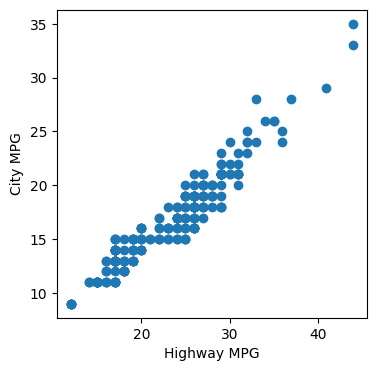

In [3]:
plt.figure(figsize=(4,4))
plt.scatter(mpg['hwy'],mpg['cty'])
plt.xlabel('Highway MPG')
plt.ylabel('City MPG')
plt.show()

## **Exercise 3**

### Make a bar plot of manufacturer. Flip it so that the manufacturers are on the y-axis. Order the bars by height. Which manufacturer produced the most cars? Which produced the least?

We can see that dodge produced the most, while lincoln produced the least.

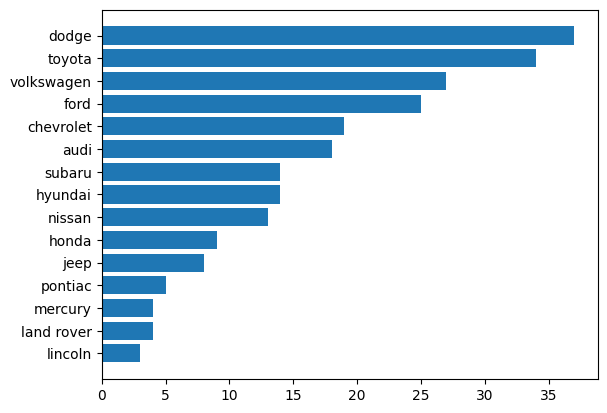

In [4]:
manufac_counts = mpg['manufacturer'].value_counts().sort_values()

plt.barh(y = manufac_counts.index, width=manufac_counts.values,)
plt.show()

## **Exercise 4**

### Make a box plot of hwy, grouped by cyl. Use geom_jitter() and the alpha argument to add points to the plot.

### Describe what you see. Is there a relationship between hwy and cyl? What do you notice?

It seems that a car with a single cylinder has much more highway MPG than a car with two cylinders.

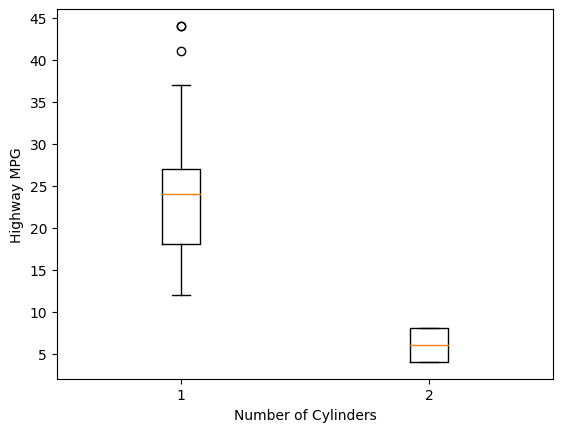

In [5]:
plt.boxplot([mpg['hwy'], mpg['cyl']])
plt.xlabel('Number of Cylinders')
plt.ylabel('Highway MPG')
plt.show()

## **Exercise 5**

### Use the corrplot package to make a lower triangle correlation matrix of the mpg dataset. (Hint: You can find information on the package here.)

### Which variables are positively or negatively correlated with which others? Do these relationships make sense to you? Are there any that surprise you?

**Positive correlation**: displ/year, displ/cyl ; year/cyl, year/hwy ; cty/hwy  
**Negative correlations**: displ/cty, displ/hwy ; year/cty ; cyl/hwy, cyl/cty

Most of these relationships make sense. However, I find it surpsrising that year is not strongly positively correlatied with cty and mpg since I would imagine that more recent car models are more efficient with MPG

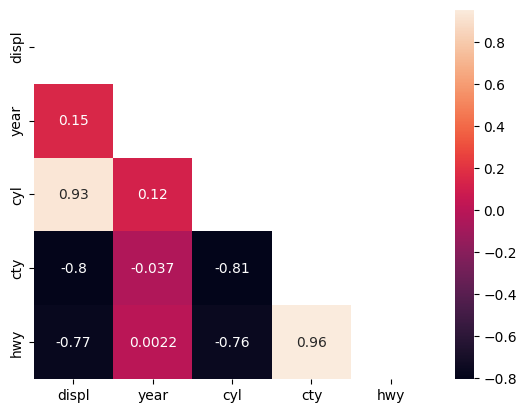

In [6]:
mpg_corr = mpg.select_dtypes([np.number]).corr()
for i in range(len(mpg_corr)):
    for j in range(i, len(mpg_corr)):
        mpg_corr.iloc[i, j] = np.nan

sns.heatmap(mpg_corr, annot=True)
plt.show()

## **Exercise 6**

### Create a swarm plot for hwy vs class

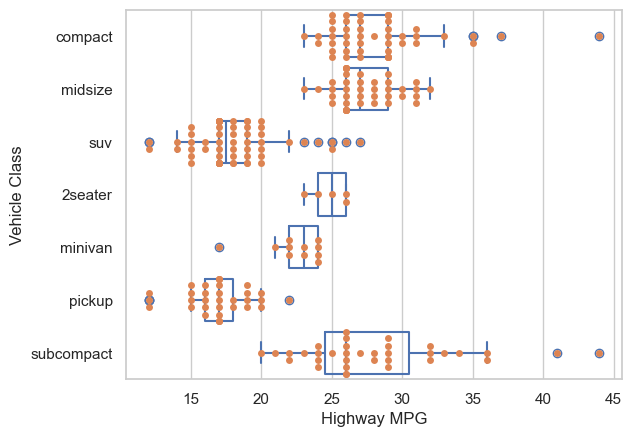

In [7]:
sns.set_theme(style='whitegrid')
sns.boxplot(x='hwy', y='class', data=mpg, fill=False)
sns.swarmplot(x='hwy', y='class', data=mpg)
plt.xlabel('Highway MPG')
plt.ylabel('Vehicle Class')
plt.show()

## **Exercise 7**

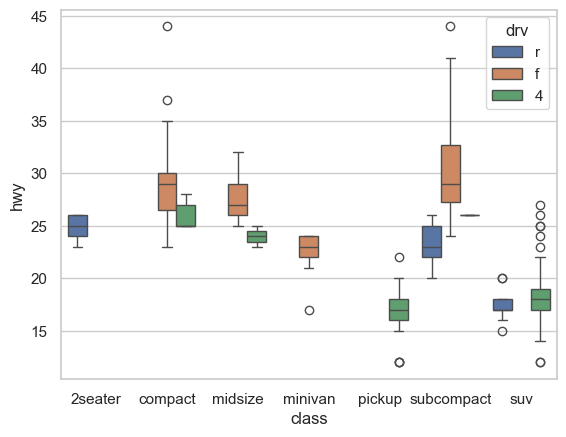

In [8]:
sns.boxplot(x='class',  y='hwy', hue='drv',data=mpg.sort_values('class'))
plt.show()

## **Exercise 8**

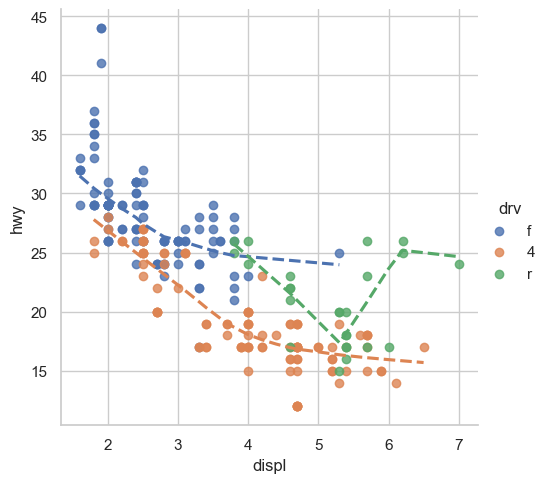

In [12]:
sns.lmplot(x='displ',y='hwy', hue='drv',data=mpg,ci=False,lowess=True,line_kws={'linestyle': '--'})
plt.xlabel('displ')
plt.ylabel('hwy')
plt.show()